In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## **Loading Data**

In [2]:
#Uploading folder
from zipfile import ZipFile
file_name="uber-pickups-in-new-york-city-20220309T110535Z-001.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')


done


In [3]:
#Combining multiple csv files into one csv file
import glob
os.chdir("/content/uber-pickups-in-new-york-city-20220309T110535Z-001/uber-pickups-in-new-york-city")

extension='csv'
allfiles = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in that list
combined = pd.concat([pd.read_csv(f) for f in allfiles])

combined.to_csv("combined.csv", index=False, encoding='utf-8-sig')

In [4]:
df=pd.read_csv("combined.csv")

df.shape

(4534327, 4)

## Data Preparation

In [5]:
#Copying data of df into another dataframe
tempdf=df.copy()

tempdf.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [6]:
#assigning datetime datatype to Date/Time column
tempdf['Date/Time'] = pd.to_datetime(tempdf['Date/Time'],format="%m/%d/%Y %H:%M:%S")
tempdf.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [7]:
tempdf.head()


,Date/Time,Lat,Lon,Base
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512


In [8]:
tempdf['weekday']= tempdf['Date/Time'].dt.day_name()
tempdf['day']= tempdf['Date/Time'].dt.day
tempdf['minute']= tempdf['Date/Time'].dt.minute
tempdf['month']= tempdf['Date/Time'].dt.month
tempdf['hour']= tempdf['Date/Time'].dt.hour

In [9]:
tempdf.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,Friday,1,3,8,0
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,Friday,1,9,8,0
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,Friday,1,12,8,0
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,Friday,1,12,8,0
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,Friday,1,12,8,0


In [10]:
tempdf.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
weekday              object
day                   int64
minute                int64
month                 int64
hour                  int64
dtype: object

## Analysing Trips of Uber

### Analysis of journey by weekdays

In [11]:
tempdf['weekday'].value_counts()

Thursday     755145
Friday       741139
Wednesday    696488
Tuesday      663789
Saturday     646114
Monday       541472
Sunday       490180
Name: weekday, dtype: int64

In [12]:
!pip install plotly

In [13]:
import plotly.express as px

px.bar(x=tempdf['weekday'].value_counts().index, y=tempdf['weekday'].value_counts())

Highest sales on Thursday

### Analysis of journey by hour

(array([216928., 103517., 227152., 543565., 324851., 366329., 819491.,
        660869., 579117., 692508.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

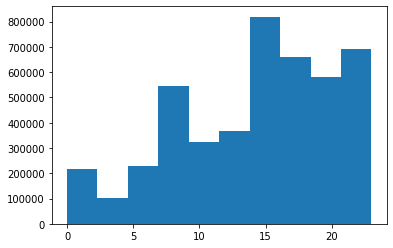

In [14]:
plt.hist(tempdf['hour'])

Peaks during evening time

### Analysis of Rush of each hour in each month

In [15]:
tempdf['month'].unique()

array([8, 7, 9, 4, 5, 6])

In [16]:
for i, month in enumerate(tempdf['month'].unique()):
  print(i)
  print(month)

0
8
1
7
2
9
3
4
4
5
5
6


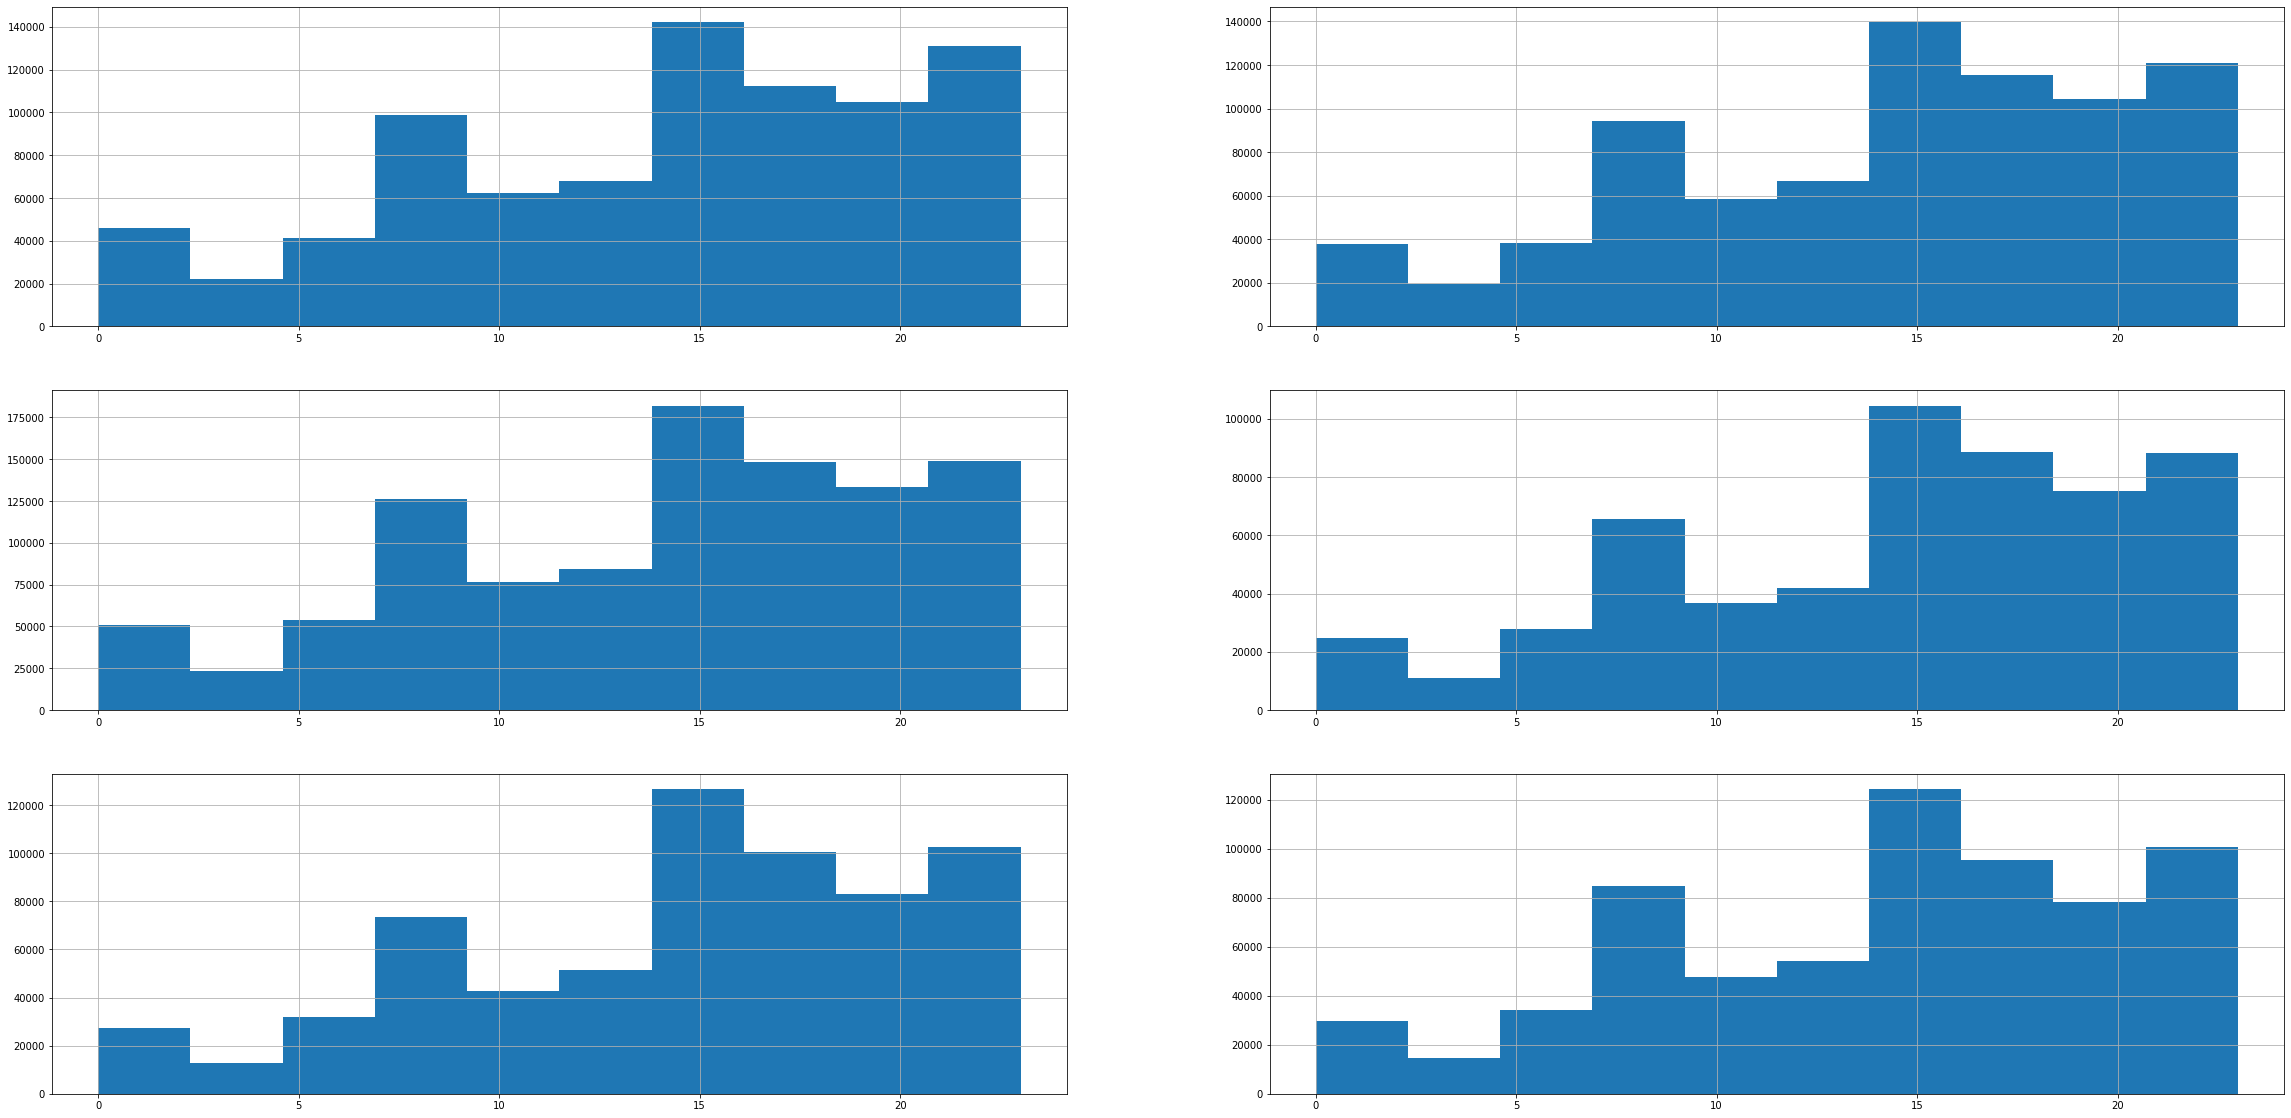

In [17]:
plt.figure(figsize=(40,20))
for i, month in enumerate(tempdf['month'].unique()):
  plt.subplot(3,2,i+1)   #for 6 months
  tempdf[tempdf['month']==month]['hour'].hist()

### Analysis of which month has max rides

In [18]:
tempdf.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,Friday,1,3,8,0
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,Friday,1,9,8,0
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,Friday,1,12,8,0
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,Friday,1,12,8,0
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,Friday,1,12,8,0


In [19]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 2.1 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=5d037a0973386fbc948e94587786e5aa194b1fe9ce3f39898cafd4699b444069
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [20]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import chart_studio.plotly as py

In [21]:
tempdf.groupby('month')['hour'].count()

month
4     564516
5     652435
6     663844
7     796121
8     829275
9    1028136
Name: hour, dtype: int64

In [22]:
trace1 = go.Bar(x=tempdf.groupby('month')['hour'].count().index, y=tempdf.groupby('month')['hour'].count(), name='Priority')
iplot([trace1])

September has maximum rush

### Analysis of Journey of Each Day

Text(0.5, 1.0, 'journey by month')

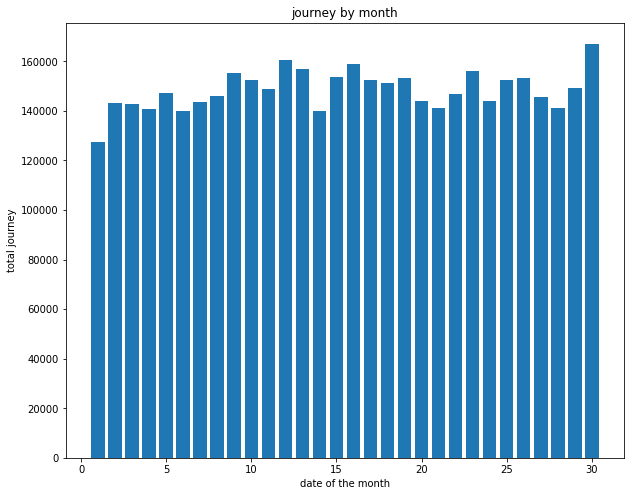

In [23]:
plt.figure(figsize=(10,8))
plt.hist(tempdf['day'],bins=30, rwidth=0.8, range=(0.5,30.5))
plt.xlabel('date of the month')
plt.ylabel('total journey')
plt.title('journey by month')

Highest rush on 30th day

### Analysis of total rides monthwise

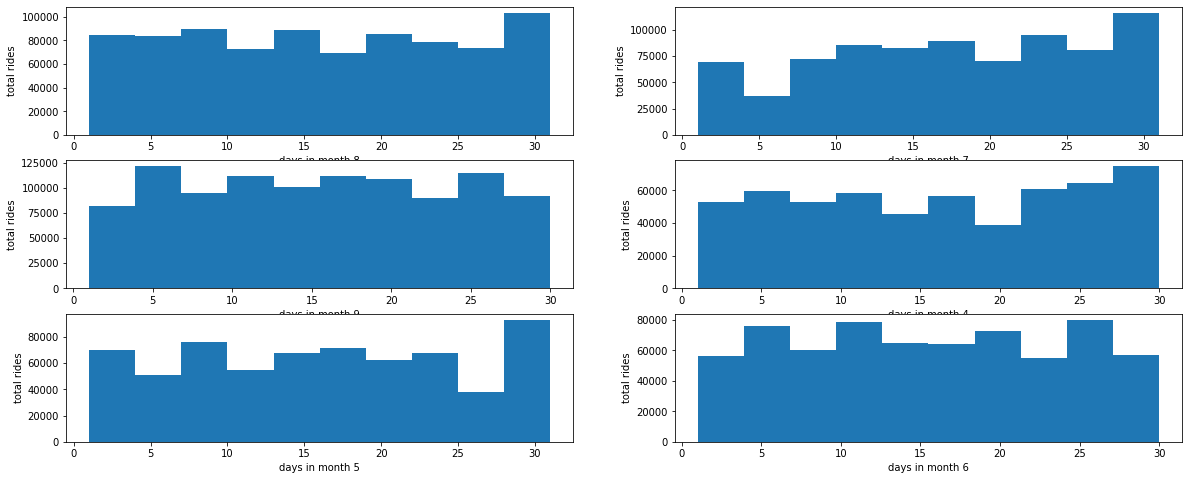

In [24]:
plt.figure(figsize=(20,8))
for i, month in enumerate(tempdf['month'].unique(),1):
  plt.subplot(3,2,i)
  df_out=tempdf[tempdf['month']==month]
  plt.hist(df_out['day'])
  plt.xlabel('days in month {}'.format(month))
  plt.ylabel('total rides')


### Analysing rush in hour per week day

Text(0.5, 1.0, 'hours of day vs Latitude of passengers')

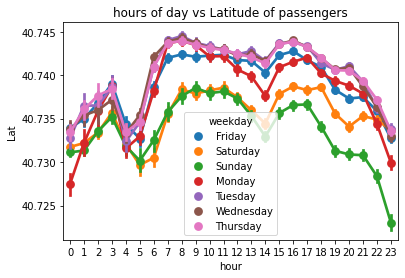

In [25]:
ax= sns.pointplot(x='hour', y='Lat', data=tempdf, hue='weekday')
ax.set_title('hours of day vs Latitude of passengers')

### Analyse which base number gets popular by month name

In [26]:
tempdf.head()


,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,Friday,1,3,8,0
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,Friday,1,9,8,0
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,Friday,1,12,8,0
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,Friday,1,12,8,0
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,Friday,1,12,8,0


In [27]:
tempdf.groupby(['Base','month'])['Date/Time'].count()

Base    month
B02512  4         35536
        5         36765
        6         32509
        7         35021
        8         31472
        9         34370
B02598  4        183263
        5        260549
        6        242975
        7        245597
        8        220129
        9        240600
B02617  4        108001
        5        122734
        6        184460
        7        310160
        8        355803
        9        377695
B02682  4        227808
        5        222883
        6        194926
        7        196754
        8        173280
        9        197138
B02764  4          9908
        5          9504
        6          8974
        7          8589
        8         48591
        9        178333
Name: Date/Time, dtype: int64

In [28]:
base=tempdf.groupby(['Base','month'])['Date/Time'].count().reset_index()
base

,Base,month,Date/Time
0,B02512,4,35536
1,B02512,5,36765
2,B02512,6,32509
3,B02512,7,35021
4,B02512,8,31472
5,B02512,9,34370
6,B02598,4,183263
7,B02598,5,260549
8,B02598,6,242975
9,B02598,7,245597


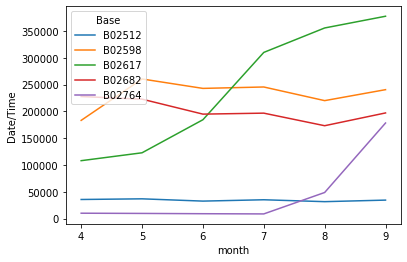

In [29]:
sns.lineplot(x='month',y='Date/Time', hue='Base', data=base)

B02617 gets popular every month

## Cross analysis using Heat maps

### Heatmap by hour and weekday

In [30]:
def count_rows(rows):
  return len(rows)
  

In [31]:
weekday_hour= tempdf.groupby(['weekday','hour']).apply(count_rows)
weekday_hour

weekday    hour
Friday     0       13716
           1        8163
           2        5350
           3        6930
           4        8806
                   ...  
Wednesday  19      47017
           20      47772
           21      44553
           22      32868
           23      18146
Length: 168, dtype: int64

In [32]:
#creating pivot table
pivot=weekday_hour.unstack()
pivot

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,...,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Monday,6436,3737,2938,6232,9640,15032,23746,31159,29265,22197,...,28157,32744,38770,42023,37000,34159,32849,28925,20158,11811
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,...,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174
Sunday,32877,23015,15436,10597,6374,6169,6596,8728,12128,16401,...,28151,31112,33038,31521,28291,25948,25076,23967,19566,12166
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,...,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764
Tuesday,6237,3509,2571,4494,7548,14241,26872,36599,33934,25023,...,34846,41338,48667,55500,50186,44789,44661,39913,27712,14869
Wednesday,7644,4324,3141,4855,7511,13794,26943,36495,33826,25635,...,35148,43388,50684,55637,52732,47017,47772,44553,32868,18146


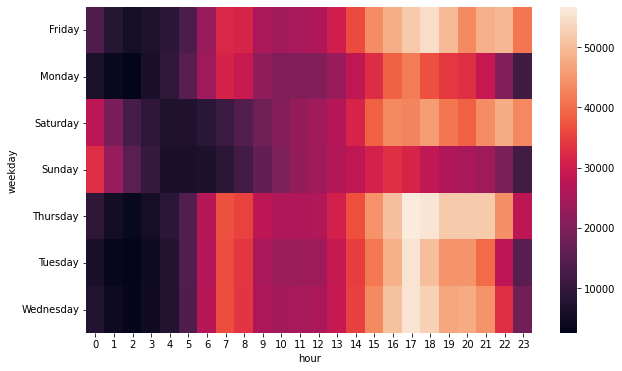

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot)

### Heatmap by Hour and Day

In [34]:
# creating fuction for heatmap
def heatmap(col1,col2):
  col1_col2= tempdf.groupby([col1,col2]).apply(count_rows)
  pivot=col1_col2.unstack()
  plt.figure(figsize=(10,6))
  return sns.heatmap(pivot)

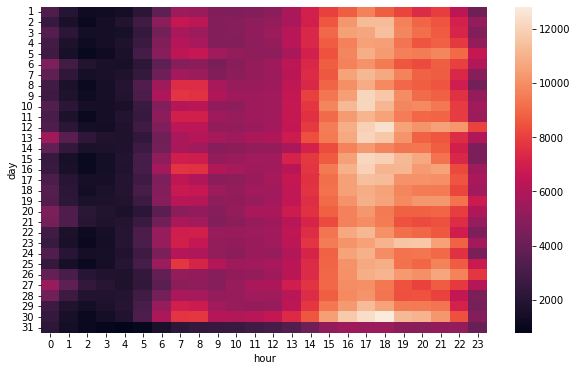

In [35]:
heatmap('day','hour')

### Heatmap by day and month

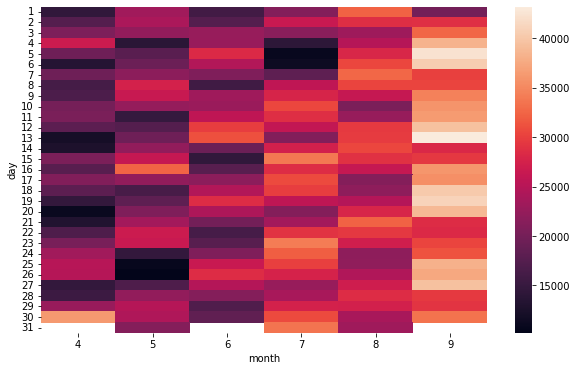

In [36]:
heatmap('day','month')

We observe that the number of trips increases each month, we can say that from April to September 2014, Uber was in a continuous improvement process.

## Analysis of location data points

In [37]:
tempdf.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,Friday,1,3,8,0
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,Friday,1,9,8,0
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,Friday,1,12,8,0
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,Friday,1,12,8,0
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,Friday,1,12,8,0


(40.5, 41.0)

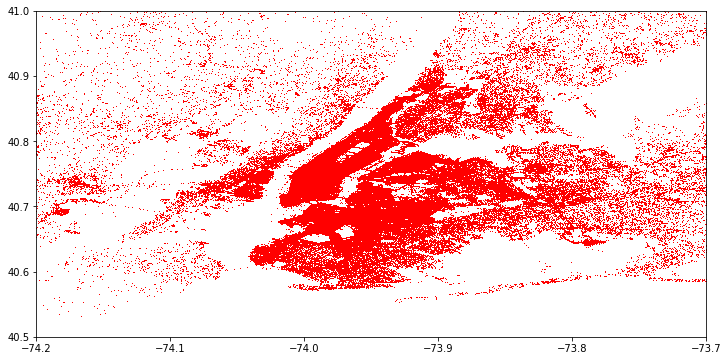

In [38]:
plt.figure(figsize=(12,6))
plt.plot(tempdf['Lon'],tempdf['Lat'],'r+',ms=0.5)
plt.xlim(-74.2,-73.7)
plt.ylim(40.5,41)

Midtown Manhattan is clearly a huge bright spot.

## Analysis of Uber Base Number

In [42]:
uber_foil= pd.read_csv('/content/Uber-Jan-Feb-FOIL.csv')
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [44]:
uber_foil.shape

(354, 4)

In [45]:
uber_foil['dispatching_base_number'].unique()

array(['B02512', 'B02765', 'B02764', 'B02682', 'B02617', 'B02598'],
      dtype=object)

### Base Number having most active vehicles

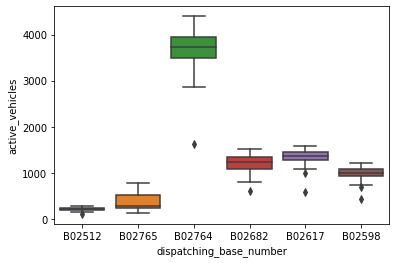

In [46]:
#using boxplot because multiple base numbers
sns.boxplot(x='dispatching_base_number',y='active_vehicles', data=uber_foil)

B02764 has maximum number of active vehicles

### Base Number having maximum trips

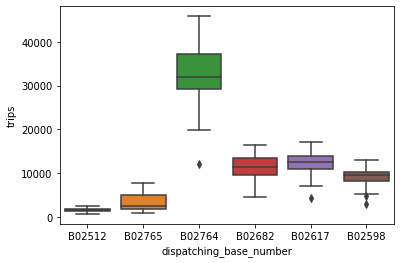

In [47]:
sns.boxplot(x='dispatching_base_number',y='trips', data=uber_foil)

B02764 has max trips as well

### How Average trips/vehicles increases/decreases with dates with each of base number?

In [49]:
#finding trips per vehicles
uber_foil['trips/vehicle']=uber_foil['trips']/uber_foil['active_vehicles']
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips,trips/vehicle
0,B02512,1/1/2015,190,1132,5.957895
1,B02765,1/1/2015,225,1765,7.844444
2,B02764,1/1/2015,3427,29421,8.585060
3,B02682,1/1/2015,945,7679,8.125926
4,B02617,1/1/2015,1228,9537,7.766287


In [53]:
#making 'date' as index
uber_foil.set_index('date')

,dispatching_base_number,active_vehicles,trips,trips/vehicle
date,,,,
1/1/2015,B02512,190,1132,5.957895
1/1/2015,B02765,225,1765,7.844444
1/1/2015,B02764,3427,29421,8.585060
1/1/2015,B02682,945,7679,8.125926
1/1/2015,B02617,1228,9537,7.766287
...,...,...,...,...
2/28/2015,B02764,3952,39812,10.073887
2/28/2015,B02617,1372,14022,10.220117
2/28/2015,B02682,1386,14472,10.441558


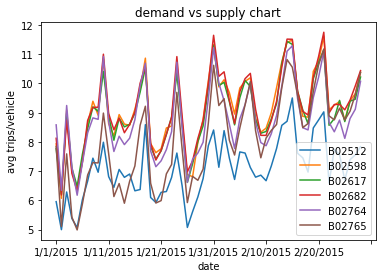

In [57]:
uber_foil.set_index('date').groupby(['dispatching_base_number'])['trips/vehicle'].plot()

plt.ylabel('avg trips/vehicle')
plt.title('demand vs supply chart')
plt.legend()

B02598 and B02764 have good performance. Whereas B02512 doesnt perform good compared to others